# Model Comparison

---

## 1. VGG16

The botleneck features for the VGG16 deep learning are imported in the cell below for the training, validation and test datasets.

In [2]:
import numpy as np
from common import *

bottleneck_features = np.load('data/bottleneck_features/yelp_vgg16.npz')
train_vgg16 = bottleneck_features['train_features']
valid_vgg16 = bottleneck_features['valid_features']
test_vgg16 = bottleneck_features['test_features']

train_targets = bottleneck_features['train_targets']
valid_targets = bottleneck_features['valid_targets']
test_targets = bottleneck_features['test_targets']

A simple Convolutional Neural Network is created below. It is made of a global average pooling layer and a fully connected layer, where the latter contains one node for each label, i.e. 9, and is equipped with a `sigmoid` activation function. Note that this CNN takes the VGG16 bottleneck features as input.

In [3]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense

vgg16 = Sequential()
vgg16.add(GlobalAveragePooling2D(input_shape = train_vgg16.shape[1:]) )
vgg16.add(Dense(9, activation = 'sigmoid') )

vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 4617      
Total params: 4,617
Trainable params: 4,617
Non-trainable params: 0
_________________________________________________________________


The CNN is then compiled and trained in the cells below.

In [4]:
from keras.optimizers import SGD

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
vgg16.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [5]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='data/saved_models/weights_compare_vgg16.hdf5', save_best_only=True)
checkimprovement = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)

history_vgg16 = vgg16.fit(train_vgg16, train_targets, 
                          validation_data=(valid_vgg16,valid_targets), 
                          epochs=300, batch_size=64, verbose = 2,
                          callbacks=[checkpointer,checkimprovement])

Train on 30000 samples, validate on 3000 samples
Epoch 1/300
 - 3s - loss: 1.9064 - acc: 0.5545 - val_loss: 1.6025 - val_acc: 0.5668
Epoch 2/300
 - 3s - loss: 1.5323 - acc: 0.5615 - val_loss: 1.4152 - val_acc: 0.5688
Epoch 3/300
 - 3s - loss: 1.3811 - acc: 0.5636 - val_loss: 1.3026 - val_acc: 0.5715
Epoch 4/300
 - 3s - loss: 1.2803 - acc: 0.5655 - val_loss: 1.2220 - val_acc: 0.5714
Epoch 5/300
 - 3s - loss: 1.2051 - acc: 0.5666 - val_loss: 1.1606 - val_acc: 0.5765
Epoch 6/300
 - 3s - loss: 1.1453 - acc: 0.5676 - val_loss: 1.1114 - val_acc: 0.5783
Epoch 7/300
 - 3s - loss: 1.0954 - acc: 0.5698 - val_loss: 1.0670 - val_acc: 0.5774
Epoch 8/300
 - 3s - loss: 1.0542 - acc: 0.5710 - val_loss: 1.0290 - val_acc: 0.5755
Epoch 9/300
 - 3s - loss: 1.0178 - acc: 0.5725 - val_loss: 0.9979 - val_acc: 0.5797
Epoch 10/300
 - 3s - loss: 0.9860 - acc: 0.5733 - val_loss: 0.9687 - val_acc: 0.5809
Epoch 11/300
 - 3s - loss: 0.9578 - acc: 0.5753 - val_loss: 0.9448 - val_acc: 0.5796
Epoch 12/300
 - 3s - loss

The loss and accuracy across epochs for the training and validation data are plotted.

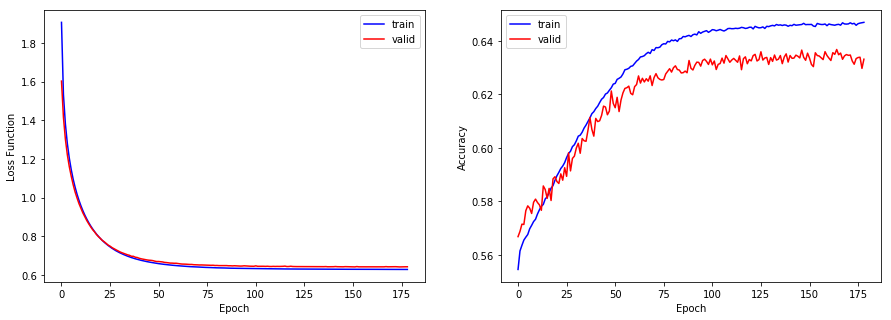

In [6]:
history(history_vgg16)

In [ ]:
vgg16.load_weights('saved_models/weights_compare_vgg16.hdf5')

The predictions on the test dataset are calculated and the $F_1$ score is derived.

In [7]:
vgg16_predictions = vgg16.predict(test_vgg16)

In [8]:
vgg16_score = f1_score(test_targets, vgg16_predictions)
print('F1 score: %.2f' % vgg16_score)

F1 score: 0.66


## 2. Xception

In [9]:
import numpy as np

from common import *

bottleneck_features = np.load('data/bottleneck_features/yelp_xception.npz')
train_xception = bottleneck_features['train_features']
valid_xception = bottleneck_features['valid_features']
test_xception = bottleneck_features['test_features']

train_targets = bottleneck_features['train_targets']
valid_targets = bottleneck_features['valid_targets']
test_targets = bottleneck_features['test_targets']

In [10]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense

xception = Sequential()
xception.add(GlobalAveragePooling2D(input_shape = train_xception.shape[1:]) )
xception.add(Dense(9, activation = 'sigmoid') )

xception.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 18441     
Total params: 18,441
Trainable params: 18,441
Non-trainable params: 0
_________________________________________________________________


In [11]:
from keras.optimizers import SGD

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
xception.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='data/saved_models/weights_compare_xception.hdf5', save_best_only=True)
checkimprovement = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)

history_xception = xception.fit(train_xception, train_targets, 
                                validation_data=(valid_xception,valid_targets), 
                                epochs=300, batch_size=64, verbose=2,
                                callbacks=[checkpointer,checkimprovement])

Train on 30000 samples, validate on 3000 samples
Epoch 1/300
 - 8s - loss: 0.8813 - acc: 0.5790 - val_loss: 0.7965 - val_acc: 0.5957
Epoch 2/300
 - 8s - loss: 0.7681 - acc: 0.5900 - val_loss: 0.7544 - val_acc: 0.5971
Epoch 3/300
 - 8s - loss: 0.7387 - acc: 0.5957 - val_loss: 0.7314 - val_acc: 0.5974
Epoch 4/300
 - 8s - loss: 0.7218 - acc: 0.6001 - val_loss: 0.7189 - val_acc: 0.6035
Epoch 5/300
 - 8s - loss: 0.7106 - acc: 0.6035 - val_loss: 0.7088 - val_acc: 0.6049
Epoch 6/300
 - 8s - loss: 0.7021 - acc: 0.6060 - val_loss: 0.7006 - val_acc: 0.6074
Epoch 7/300
 - 8s - loss: 0.6957 - acc: 0.6081 - val_loss: 0.6961 - val_acc: 0.6090
Epoch 8/300
 - 8s - loss: 0.6904 - acc: 0.6094 - val_loss: 0.6911 - val_acc: 0.6097
Epoch 9/300
 - 8s - loss: 0.6863 - acc: 0.6107 - val_loss: 0.6889 - val_acc: 0.6106
Epoch 10/300
 - 8s - loss: 0.6824 - acc: 0.6122 - val_loss: 0.6862 - val_acc: 0.6153
Epoch 11/300
 - 8s - loss: 0.6796 - acc: 0.6137 - val_loss: 0.6818 - val_acc: 0.6131
Epoch 12/300
 - 8s - loss

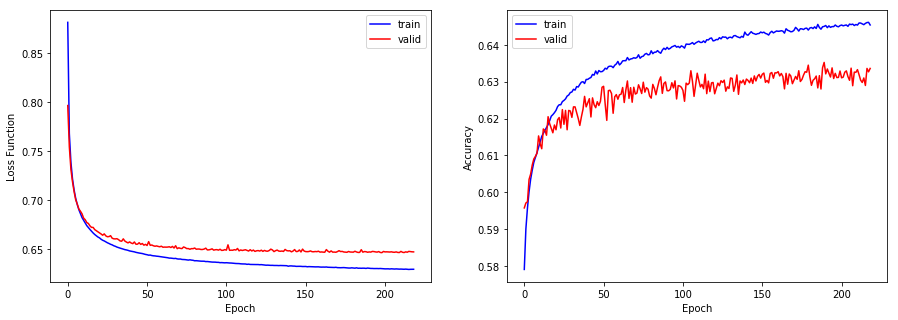

In [13]:
history(history_xception)

In [ ]:
xception.load_weights('saved_models/weights_compare_xception.hdf5')

In [14]:
xception_predictions = xception.predict(test_xception)

In [15]:
xception_score = f1_score(test_targets, xception_predictions)
print('F1 score: %.2f' % xception_score)

F1 score: 0.65


## 3. ResNet50

In [16]:
import numpy as np

from common import *

bottleneck_features = np.load('data/bottleneck_features/yelp_resnet50.npz')
train_resnet50 = bottleneck_features['train_features']
valid_resnet50 = bottleneck_features['valid_features']
test_resnet50 = bottleneck_features['test_features']

train_targets = bottleneck_features['train_targets']
valid_targets = bottleneck_features['valid_targets']
test_targets = bottleneck_features['test_targets']

In [17]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense

resnet50 = Sequential()
resnet50.add(GlobalAveragePooling2D(input_shape=train_resnet50.shape[1:]))
resnet50.add(Dense(9, activation = 'sigmoid'))

resnet50.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 18441     
Total params: 18,441
Trainable params: 18,441
Non-trainable params: 0
_________________________________________________________________


In [18]:
from keras.optimizers import SGD

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
resnet50.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='data/saved_models/weights_compare_resnet50.hdf5', save_best_only=True)
checkimprovement = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)

history_resnet50 = resnet50.fit(train_resnet50, train_targets, 
                                validation_data=(valid_resnet50,valid_targets), 
                                epochs=400, batch_size=64, verbose=2,
                                callbacks=[checkpointer,checkimprovement])

Train on 30000 samples, validate on 3000 samples
Epoch 1/400
 - 2s - loss: 0.7346 - acc: 0.5781 - val_loss: 0.7025 - val_acc: 0.5973
Epoch 2/400
 - 2s - loss: 0.7010 - acc: 0.6016 - val_loss: 0.6944 - val_acc: 0.6013
Epoch 3/400
 - 2s - loss: 0.6943 - acc: 0.6052 - val_loss: 0.6890 - val_acc: 0.6027
Epoch 4/400
 - 2s - loss: 0.6894 - acc: 0.6071 - val_loss: 0.6849 - val_acc: 0.6073
Epoch 5/400
 - 2s - loss: 0.6856 - acc: 0.6089 - val_loss: 0.6816 - val_acc: 0.6083
Epoch 6/400
 - 2s - loss: 0.6824 - acc: 0.6097 - val_loss: 0.6789 - val_acc: 0.6086
Epoch 7/400
 - 2s - loss: 0.6797 - acc: 0.6114 - val_loss: 0.6768 - val_acc: 0.6084
Epoch 8/400
 - 2s - loss: 0.6776 - acc: 0.6121 - val_loss: 0.6749 - val_acc: 0.6084
Epoch 9/400
 - 2s - loss: 0.6756 - acc: 0.6125 - val_loss: 0.6732 - val_acc: 0.6105
Epoch 10/400
 - 2s - loss: 0.6739 - acc: 0.6137 - val_loss: 0.6718 - val_acc: 0.6104
Epoch 11/400
 - 2s - loss: 0.6724 - acc: 0.6144 - val_loss: 0.6704 - val_acc: 0.6110
Epoch 12/400
 - 2s - loss

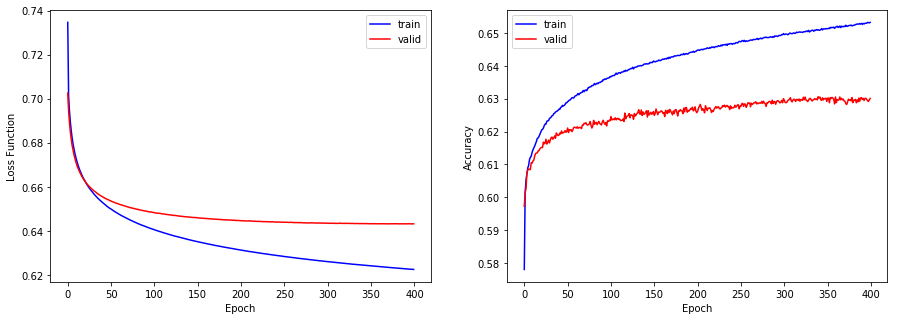

In [20]:
history(history_resnet50)

In [ ]:
resnet50.load_weights('saved_models/weights_compare_resnet50.hdf5')

In [21]:
resnet50_predictions = resnet50.predict(test_resnet50)

In [22]:
resnet50_score = f1_score(test_targets, resnet50_predictions)
print('F1 score: %.2f' % resnet50_score)

F1 score: 0.65
